In [3]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline_csv

In [9]:
# задаем пути
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'

In [75]:
# читаем тренировочные исходные данные
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [76]:
# читаем тестовые исходные данные
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [77]:
# смотрим размерность датасетов
train_df.shape

(10000, 20)

In [78]:
# переводим эти колонки в текст, так как это по сути названия, а не числовые значения
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

In [79]:
# проверяем данные, есть ли пустые
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  object 
 1   DistrictId     10000 non-null  object 
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [189]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

# Анализ выбросов (EDA)

In [80]:
# анализируем выбросы которые сильно отличаются от среднего
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### Rooms

In [81]:
train_df["Rooms"].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [192]:
cond_rooms_1 = ((train_df['Rooms'] >= 6) | (train_df['Rooms'] == 0)) & train_df['Square'] < 100
cond_rooms_1.value_counts()

True    10000
dtype: int64

In [34]:
# создаем признак замененных данных Rooms
# train_df["Rooms_outlier"] = 0
# train_df.loc[(train_df['Rooms'] == 0) | (train_df['Rooms'] >= 6) & (train_df['Square'] < 100), 'Rooms_outlier'] = 1

In [82]:
train_df.loc[((train_df['Rooms'] == 0) | (train_df['Rooms'] >= 6))] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2004,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
2194,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
2728,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863
3780,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
5894,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
6088,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
6401,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007
7644,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
7929,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
8794,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416


In [83]:
train_df['Rooms'].median()

2.0

In [87]:
# заменяем некорректные Rooms на средние
train_df.loc[((train_df['Rooms'] >= 6) | (train_df['Rooms'] == 0)) & (train_df['Square'] < 100), 'Rooms'] = train_df['Rooms'].median()

In [94]:
train_df.loc[(train_df['Rooms'] == 0) & (train_df['Square'] > 100), 'Rooms'] = 6

In [96]:
train_df["Rooms"].value_counts()

2.0    3890
1.0    3705
3.0    2235
4.0     150
5.0      18
6.0       2
Name: Rooms, dtype: int64

### Square, Kitchen Square

In [106]:
# находим некорректные KitchenSquare
train_df.loc[(train_df["Square"] < train_df["KitchenSquare"]) | (train_df["Square"] < (train_df["KitchenSquare"] + train_df["LifeSquare"])) ]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
33,847,74,2.0,73.314975,74.131261,1.0,7,6.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,254005.381863
34,7757,27,2.0,58.783661,55.441256,11.0,13,12.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,138396.984612
42,8576,4,2.0,53.179791,50.643797,5.0,5,12.0,1976,0.042032,B,B,37,6856,84,1940.0,2,5,B,308108.233873
48,12307,60,1.0,40.064914,38.733288,8.0,13,14.0,1974,0.007659,B,B,35,7077,56,2301.0,3,19,B,160810.546681
64,3992,1,3.0,87.200625,87.730225,0.0,21,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,300180.365669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705
9962,14175,14,1.0,42.029175,44.682167,10.0,4,4.0,2018,0.238617,B,B,26,3889,6,705.0,3,6,B,87556.385617
9979,2201,6,1.0,40.043234,41.984322,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,134888.083598
9987,11665,1,2.0,62.690057,64.602939,10.0,19,22.0,2018,0.007122,B,B,1,264,0,NaN,0,1,B,203908.192698


In [111]:
train_df["KitchenSquare"].value_counts()

1.0     2460
8.0     1306
5.0     1169
10.0    1075
6.0     1042
9.0      843
0.0      697
7.0      609
13.0     252
12.0     249
11.0     233
4.0       39
3.0       22
2.0        4
Name: KitchenSquare, dtype: int64

In [108]:
train_df["KitchenSquare"].quantile(.975)

13.0

In [193]:
train_df["DistrictId"].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
199      1
196      1
205      1
174      1
117      1
Name: DistrictId, Length: 205, dtype: int64

In [110]:
# заменяем слишком большие KitchenSquare на квантиль 975
train_df.loc[train_df["KitchenSquare"] > train_df["KitchenSquare"].quantile(.975), "KitchenSquare"] = train_df['KitchenSquare'].quantile(.975)

In [112]:
# находим некорректные Square
train_df.loc[train_df["Square"] < train_df["LifeSquare"] + train_df["KitchenSquare"]]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
33,847,74,2.0,73.314975,74.131261,1.0,7,6.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,254005.381863
34,7757,27,2.0,58.783661,55.441256,11.0,13,12.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,138396.984612
42,8576,4,2.0,53.179791,50.643797,5.0,5,12.0,1976,0.042032,B,B,37,6856,84,1940.0,2,5,B,308108.233873
48,12307,60,1.0,40.064914,38.733288,8.0,13,14.0,1974,0.007659,B,B,35,7077,56,2301.0,3,19,B,160810.546681
64,3992,1,3.0,87.200625,87.730225,0.0,21,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,300180.365669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,16258,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705
9962,14175,14,1.0,42.029175,44.682167,10.0,4,4.0,2018,0.238617,B,B,26,3889,6,705.0,3,6,B,87556.385617
9979,2201,6,1.0,40.043234,41.984322,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,134888.083598
9987,11665,1,2.0,62.690057,64.602939,10.0,19,22.0,2018,0.007122,B,B,1,264,0,NaN,0,1,B,203908.192698


In [113]:
# заменяем слишком маленькие Square на сумму Square + KitchenSquare
train_df.loc[train_df["Square"] < train_df["LifeSquare"] + train_df["KitchenSquare"] , "Square"] = train_df["LifeSquare"] + train_df["KitchenSquare"]

### Floor, House Floor

In [129]:
# находим и заменяем некорректные HouseFloor (0 или меньше чем текущий Floor)
train_df.loc[(train_df['HouseFloor'] == 0), "HouseFloor"] = train_df.loc[train_df['HouseFloor'] == 0, "Floor"]
train_df.loc[(train_df['Floor'] > train_df['HouseFloor']), "HouseFloor"] = train_df.loc[(train_df['Floor'] > train_df['HouseFloor']), "Floor"]

### HouseYear

In [136]:
# заменяем все даты больше 2021 на 2021
train_df.loc[train_df['HouseYear'] > 2021, "HouseYear"] = 2021

<AxesSubplot:>

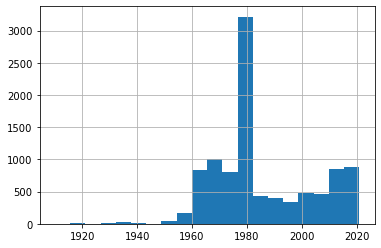

In [135]:
train_df["HouseYear"].hist(bins=20)

# Обработка пропусков

In [146]:
# пропуски есть в LifeSquare. Заменяем на разницу между (Square - Kitchen Square) * 0.8
life_sq_cond = train_df["LifeSquare"].isna()
train_df.loc[life_sq_cond, "LifeSquare"] = (train_df.loc[life_sq_cond, "Square"] - train_df.loc[life_sq_cond, "KitchenSquare"]) * 0.8

In [150]:
# удаляем колонку с пропусками HealthCare_1
train_df.drop('Healthcare_1', axis=1, inplace=True)

# Разбиение на train и test

In [162]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  object 
 1   DistrictId     10000 non-null  object 
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Price  

In [166]:
binary_to_numbers = {'A': 0, 'B': 1}
train_df["Ecology_2"] = train_df["Ecology_2"].map(binary_to_numbers)
train_df["Ecology_3"] = train_df["Ecology_3"].map(binary_to_numbers)
train_df["Shops_2"] = train_df["Shops_2"].map(binary_to_numbers)

In [169]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2']
target_name = 'Price'
X = train_df.drop(columns=target_name)
y = train_df[target_name]

In [170]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

# Построение модели

In [171]:
from sklearn.linear_model import LinearRegression

In [172]:
lr = LinearRegression()

In [173]:
lr.fit(X_train, y_train)

LinearRegression()

In [174]:
y_pred = lr.predict(X_train)

In [181]:
y_pred_valid = lr.predict(X_valid)

In [183]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

In [184]:
y_train_preds = rf_model.predict(X_train)
y_valid_preds = rf_model.predict(X_valid)

# Оценка модели

In [179]:
from sklearn.metrics import r2_score

In [180]:
R2 = r2_score(y_train, y_pred)  # коэффициент детерминации
R2

0.502071469668946

In [186]:
R2_valid = r2_score(y_valid, y_pred_valid)  # коэффициент детерминации
R2_valid

-0.6261861052370521

In [187]:
R2_rf = r2_score(y_train, y_train_preds)  # коэффициент детерминации
R2_rf

0.9594360009579803

In [188]:
R2_rf_valid = r2_score(y_valid, y_valid_preds)  # коэффициент детерминации
R2_rf_valid

0.7329616216169154